<div style="background-color: olive; padding: 40px; font-size: 40px;">
              Preprocessing: Data Scaling
</div>
  
      

In [ ]:
Exercises

Do your work for these exercises in a jupyter notebook named scaling. Use the zillow dataset you acquired and prepped in previous lesson. Once you are finished, you may wish to repeat the exercises on another dataset for additional practice.

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import QuantileTransformer

from env import get_db_url
import wrangle as w
import os
import warnings
warnings.filterwarnings("ignore")

In [53]:
# Acquire and prepares data and returns clean data frame

df = w.wrangle_zillow()


In [54]:
df.head()

,bedrooms,bathrooms,area,taxvalue,yearbuilt,taxamount,county
4,4,2.0,3633,296425,2005,6941.39,LA
6,3,4.0,1620,847770,2011,10244.94,LA
7,3,2.0,2077,646760,1926,7924.68,LA
11,0,0.0,1200,5328,1972,91.60,LA
14,0,0.0,171,6920,1973,255.17,LA


In [106]:
#split data
seed = 42
train, validate_test = train_test_split(df, train_size=0.7, random_state=seed)
validate, test = train_test_split(val_test, train_size=0.5, random_state=seed)

train.shape, validate.shape, test.shape

((1498164, 7), (321035, 7), (321036, 7))

In [57]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1498164 entries, 1007466 to 1702727
Data columns (total 7 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   bedrooms   1498164 non-null  int64  
 1   bathrooms  1498164 non-null  float64
 2   area       1498164 non-null  int64  
 3   taxvalue   1498164 non-null  int64  
 4   yearbuilt  1498164 non-null  int64  
 5   taxamount  1498164 non-null  float64
 6   county     1498164 non-null  object 
dtypes: float64(2), int64(4), object(1)
memory usage: 91.4+ MB


## Always Split the data before modeling
 -  When imputing missing data in a machine learning pipeline, it is essential to perform imputation after 
splitting the dataset into training, validation, and test sets. This approach prevents 
data leakage or spillage and ensures that imputation is based solely on information from the training set. 

# 1 Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution .

## Notes:-
#### Scaled data has cleaned data, where data after applying a scaling transformation to make all the features have a consistent scale or range
scaling techniques,

Min-Max Scaling (Normalization): This scales the data to a specific range, often [0, 1], by subtracting the minimum value and dividing by the range.

Standardization (Z-score Scaling): This scales the data to have a mean of 0 and a standard deviation of 1 by subtracting the mean and dividing by the standard deviation.

Robust Scaling: This scales the data using the median and interquartile range (IQR) to make it more robust to outliers.

Choice of scaling method depends on the characteristics of your data and the requirements of your analysis or machine learning model.

In [59]:
# creating a copy of the train DataFrame 
train_scaled = train.copy()


In [34]:
#columns to scale
to_scale = ['bedrooms','bathrooms','area','yearbuilt','taxvalue']


In [60]:
# make the object, put it into the variable scaler
scaler = MinMaxScaler()
# fit the object to my data:
train_scaled[to_scale] = scaler.fit_transform(train[to_scale])

In [61]:
train.columns

Index(['bedrooms', 'bathrooms', 'area', 'taxvalue', 'yearbuilt', 'taxamount',
       'county'],
      dtype='object')

In [62]:
train_scaled.head()

,bedrooms,bathrooms,area,taxvalue,yearbuilt,taxamount,county
1007466,0.166667,0.06250,0.001523,0.002672,0.832558,2974.81,LA
615622,0.166667,0.06250,0.001324,0.002612,0.706977,3029.22,LA
662507,0.166667,0.03125,0.001518,0.004824,0.679070,5226.67,LA
840040,0.166667,0.06250,0.001472,0.002980,0.762791,2849.62,Ventura
243798,0.166667,0.06250,0.001527,0.004047,0.744186,4582.48,LA


Text(0, 0.5, 'Count')

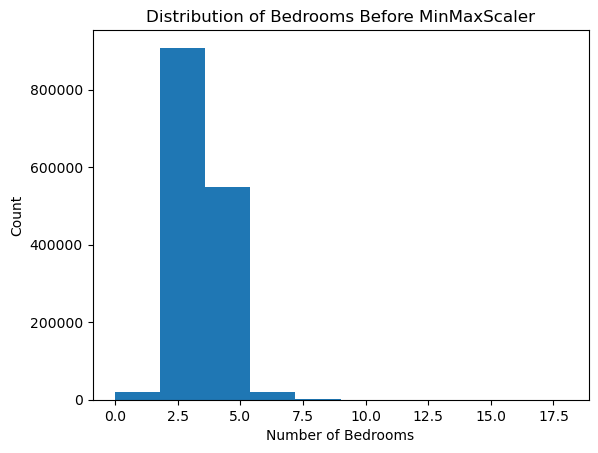

In [63]:
# Plot a histogram of the 'bedrooms' feature before applying MinMaxScaler
plt.hist(train.bedrooms)
plt.title('Distribution of Bedrooms Before MinMaxScaler')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

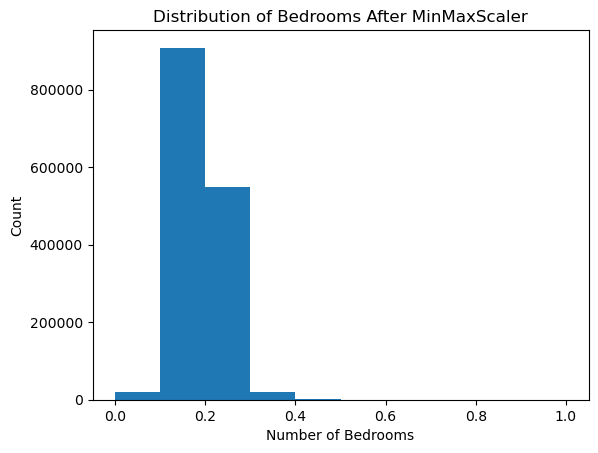

In [64]:
# Plot a histogram of the 'bedrooms' feature after applying MinMaxScaler
plt.hist(train_scaled.bedrooms)
plt.title('Distribution of Bedrooms After MinMaxScaler')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')


In [68]:
# Create subplot structure for before-and-after scaling visualization
def visualize_scaler(scaler, df, columns_to_scale, bins=10):
    #create subplot structure
    fig, axs = plt.subplots(len(columns_to_scale), 2, figsize=(12,12))

    #copy the df for scaling
    df_scaled = df.copy()
    
    #fit and transform the df
    df_scaled[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

    #plot the pre-scaled data next to the post-scaled data in one row of a subplot
    for (ax1, ax2), col in zip(axs, columns_to_scale):
        ax1.hist(df[col], bins=bins)
        ax1.set(title=f'{col} before scaling', xlabel=col, ylabel='count')
        ax2.hist(df_scaled[col], bins=bins)
        ax2.set(title=f'{col} after scaling with {scaler.__class__.__name__}', xlabel=col, ylabel='count')
    plt.tight_layout()

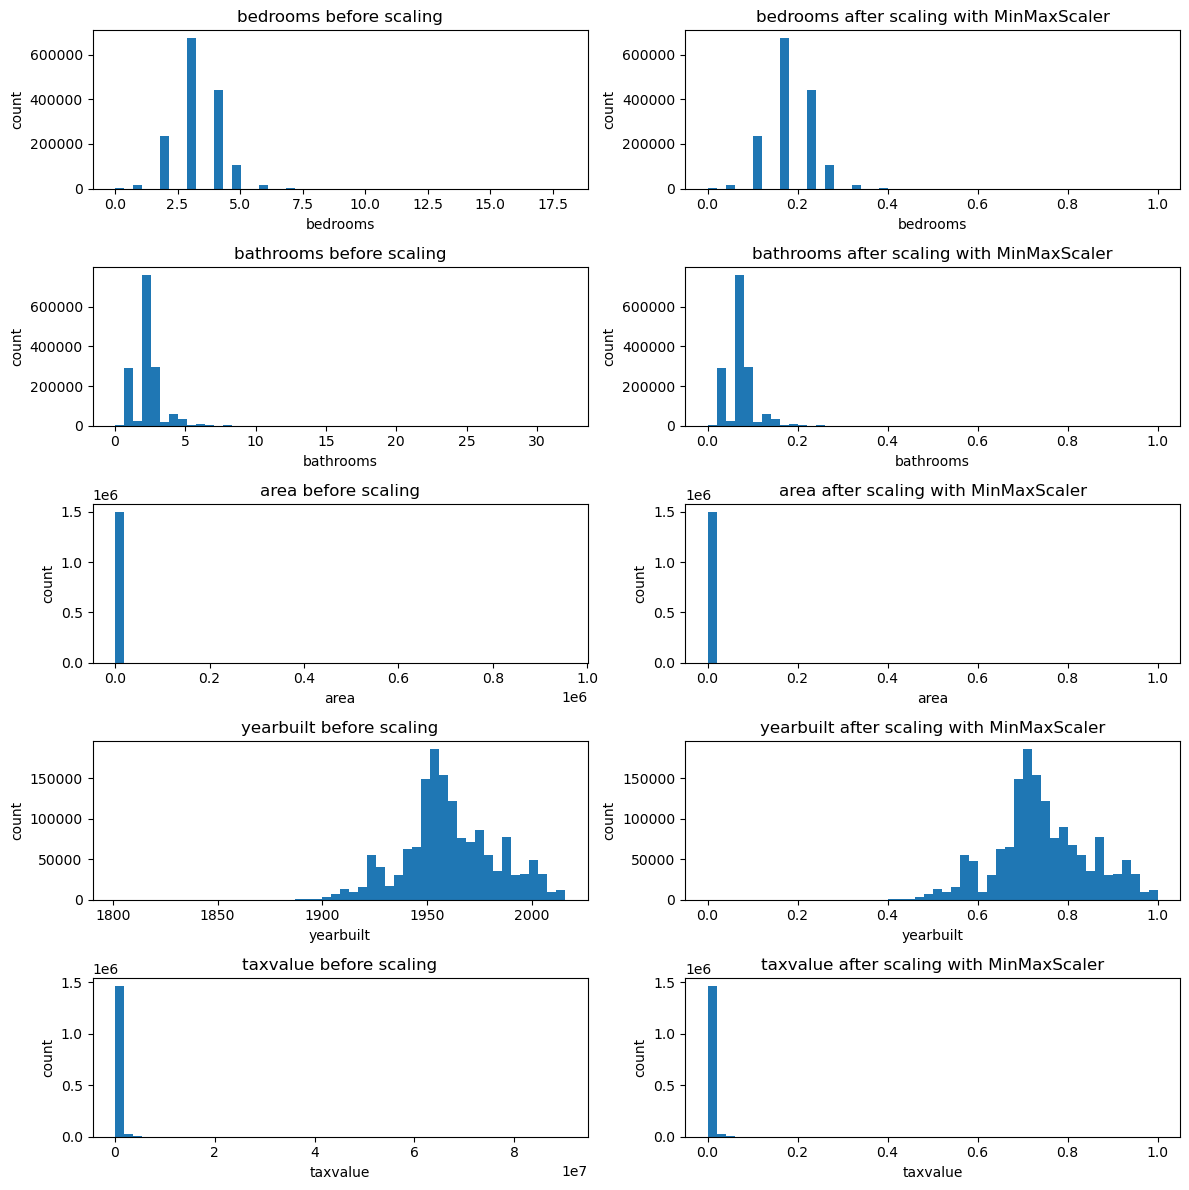

In [36]:
# call function with minmax

visualize_scaler(scaler=MinMaxScaler(), df=train, columns_to_scale=to_scale, bins=50)
                 

In [ ]:
Standardization (Z-score Scaling)

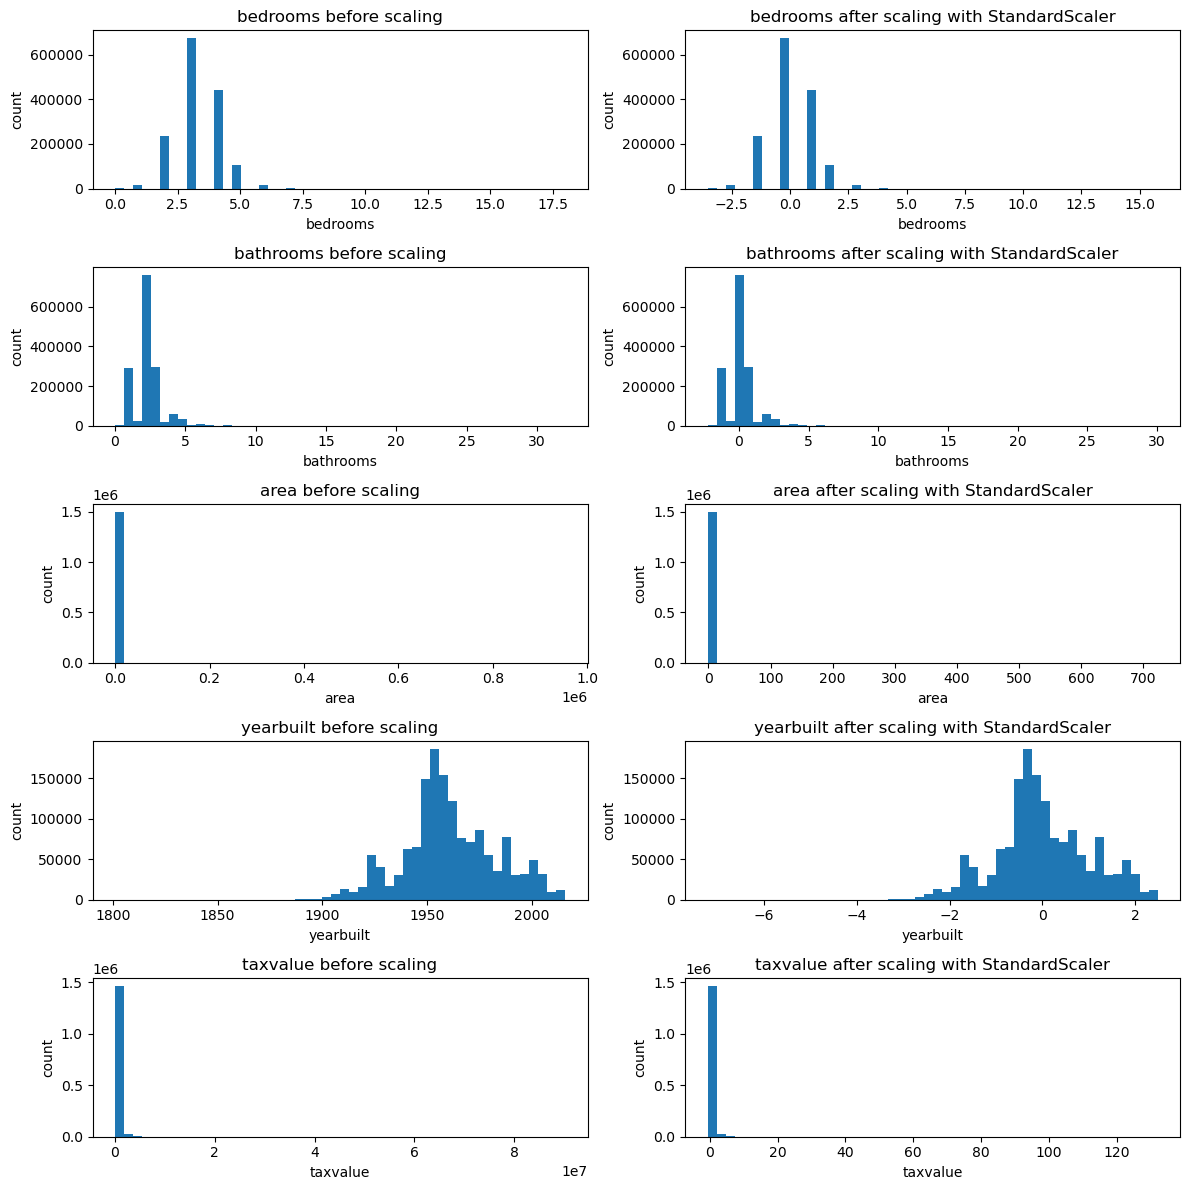

In [38]:
# call function with standard scaler
visualize_scaler(scaler=StandardScaler(), df=train, columns_to_scale=to_scale, bins=50)
                 

In [ ]:
Robust Scaling

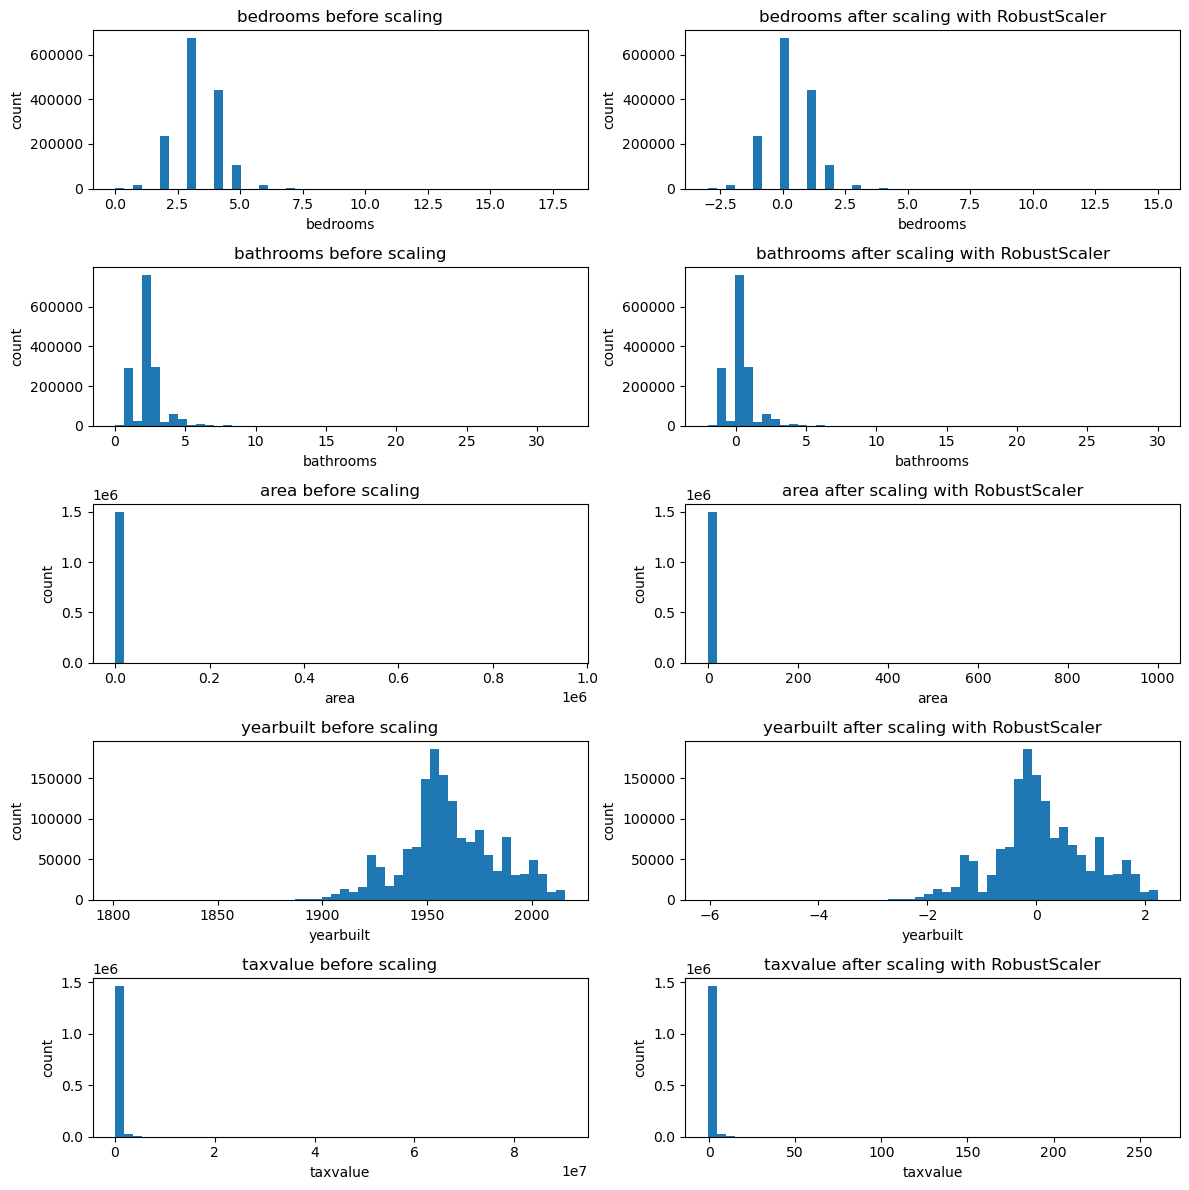

In [39]:
# call function with robustscaler
visualize_scaler(scaler=RobustScaler(), df=train, columns_to_scale=to_scale, bins=50)


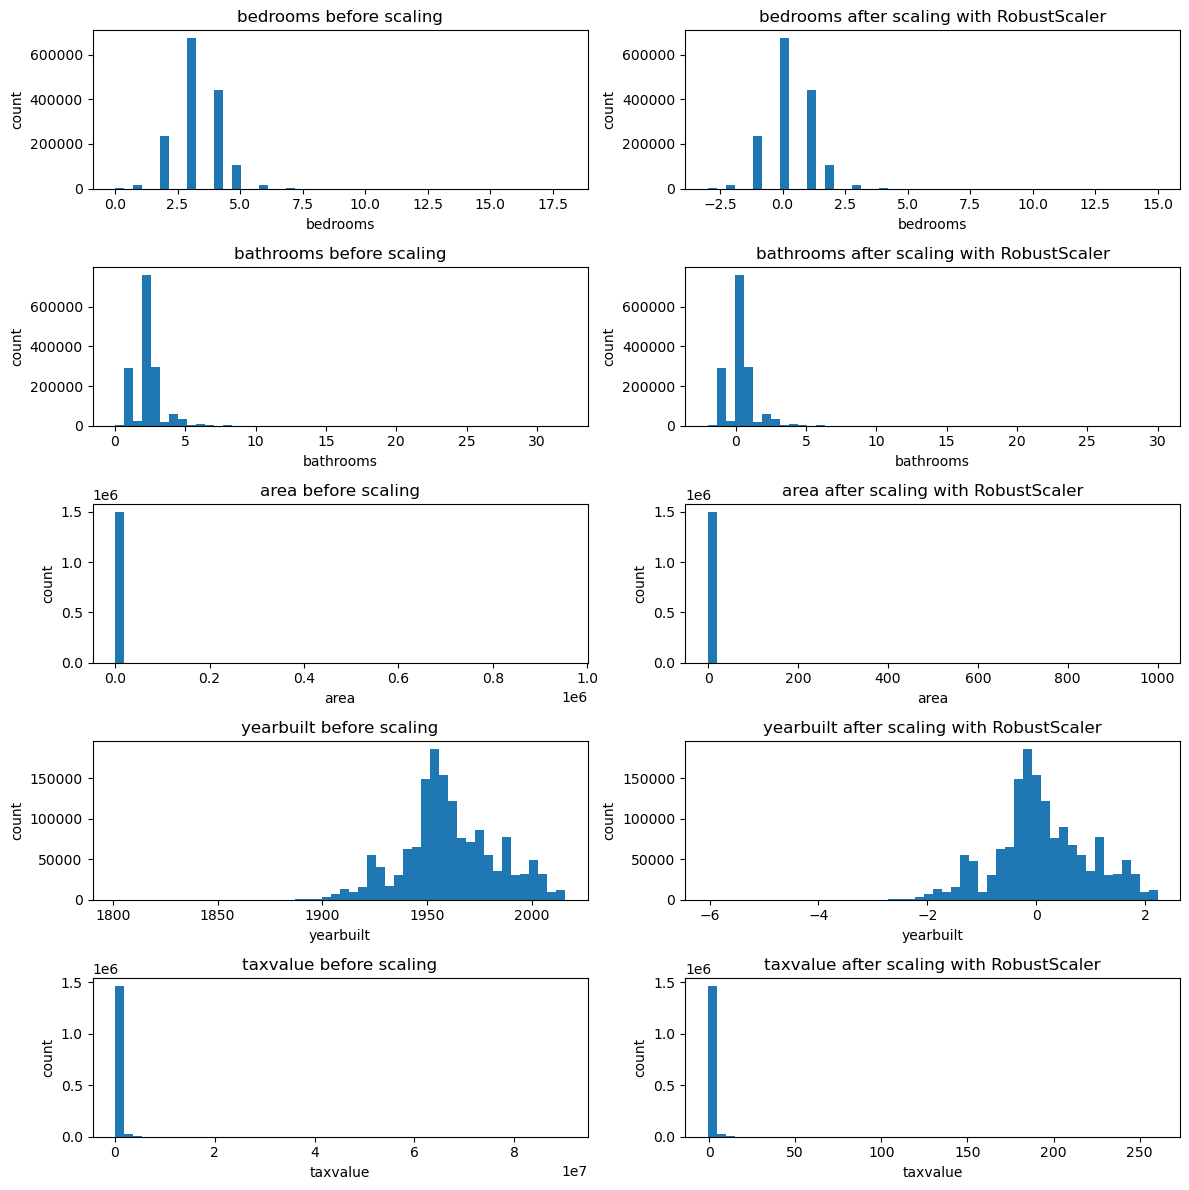

In [69]:
# RobustScaler Applied
visualize_scaler(scaler=RobustScaler(), df=train, columns_to_scale=to_scale, bins=50)


# 2 Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

Notes:-
The .inverse_transform method is used to reverse the scaling transformation that was previously applied to the data. 

Perform scaling to ensure that all features have similar scales or ranges, which can help algorithms converge faster or perform better. However, for interpretation purposes or reporting results to stakeholders, you often want to present the data in its original, meaningful units. By using .inverse_transform, you can convert the scaled data back to its original scale for easier interpretation.




In [40]:
train[to_scale].sample(3)

,bedrooms,bathrooms,area,yearbuilt,taxvalue
240258,4,3.0,2651,1965,1432073
1470110,3,3.0,2118,1950,530304
1029719,3,2.0,1431,1961,197140


In [42]:
#make it
scaler = MinMaxScaler()

#fit and use it
train_scaled = scaler.fit_transform(train[to_scale])

#convert to df
train_scaled = pd.DataFrame(train_scaled, columns=to_scale)


In [43]:
#to see scaled data
train_scaled.sample(2)

,bedrooms,bathrooms,area,yearbuilt,taxvalue
589302,0.166667,0.0625,0.001275,0.739535,0.000650
1423373,0.222222,0.0625,0.001664,0.693023,0.002917


In [44]:
#appling the inverse_transform function to the scaled data
inverse_train_scaled = scaler.inverse_transform(train_scaled)
inverse_train_scaled


array([[3.00000e+00, 2.00000e+00, 1.45200e+03, 1.98000e+03, 2.41012e+05],
       [3.00000e+00, 2.00000e+00, 1.26200e+03, 1.95300e+03, 2.35630e+05],
       [3.00000e+00, 1.00000e+00, 1.44700e+03, 1.94700e+03, 4.35123e+05],
       ...,
       [3.00000e+00, 3.00000e+00, 1.51700e+03, 1.94800e+03, 7.35768e+05],
       [2.00000e+00, 1.00000e+00, 1.39000e+03, 1.92200e+03, 7.88601e+05],
       [3.00000e+00, 2.00000e+00, 2.07000e+03, 1.97700e+03, 1.85523e+05]])

In [45]:
#converting 2d array to df and adding column names
inverted_train = pd.DataFrame(inverse_train_scaled, columns=to_scale)
inverted_train

,bedrooms,bathrooms,area,yearbuilt,taxvalue
0,3.0,2.0,1452.0,1980.0,241012.0
1,3.0,2.0,1262.0,1953.0,235630.0
2,3.0,1.0,1447.0,1947.0,435123.0
3,3.0,2.0,1403.0,1965.0,268770.0
4,3.0,2.0,1456.0,1961.0,365000.0
...,...,...,...,...,...
1498159,3.0,2.0,1281.0,1988.0,297096.0
1498160,4.0,2.0,1630.0,1949.0,179979.0
1498161,3.0,3.0,1517.0,1948.0,735768.0
1498162,2.0,1.0,1390.0,1922.0,788601.0


By using .inverse_transform, you can convert the scaled data back to its original scale for easier interpretation.

# 3 Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

Note:-
    
    output_distribution='normal':

When you specify 'normal', the QuantileTransformer transforms your data to follow a normal (Gaussian) distribution. This means that the resulting data should have properties similar to a standard normal distribution, such as a mean of 0 and a standard deviation of 1.
Achieving a true normal distribution may not always be possible, especially if your original data has extreme outliers or other non-Gaussian characteristics. The transformation will attempt to make the data as close to normal as possible.

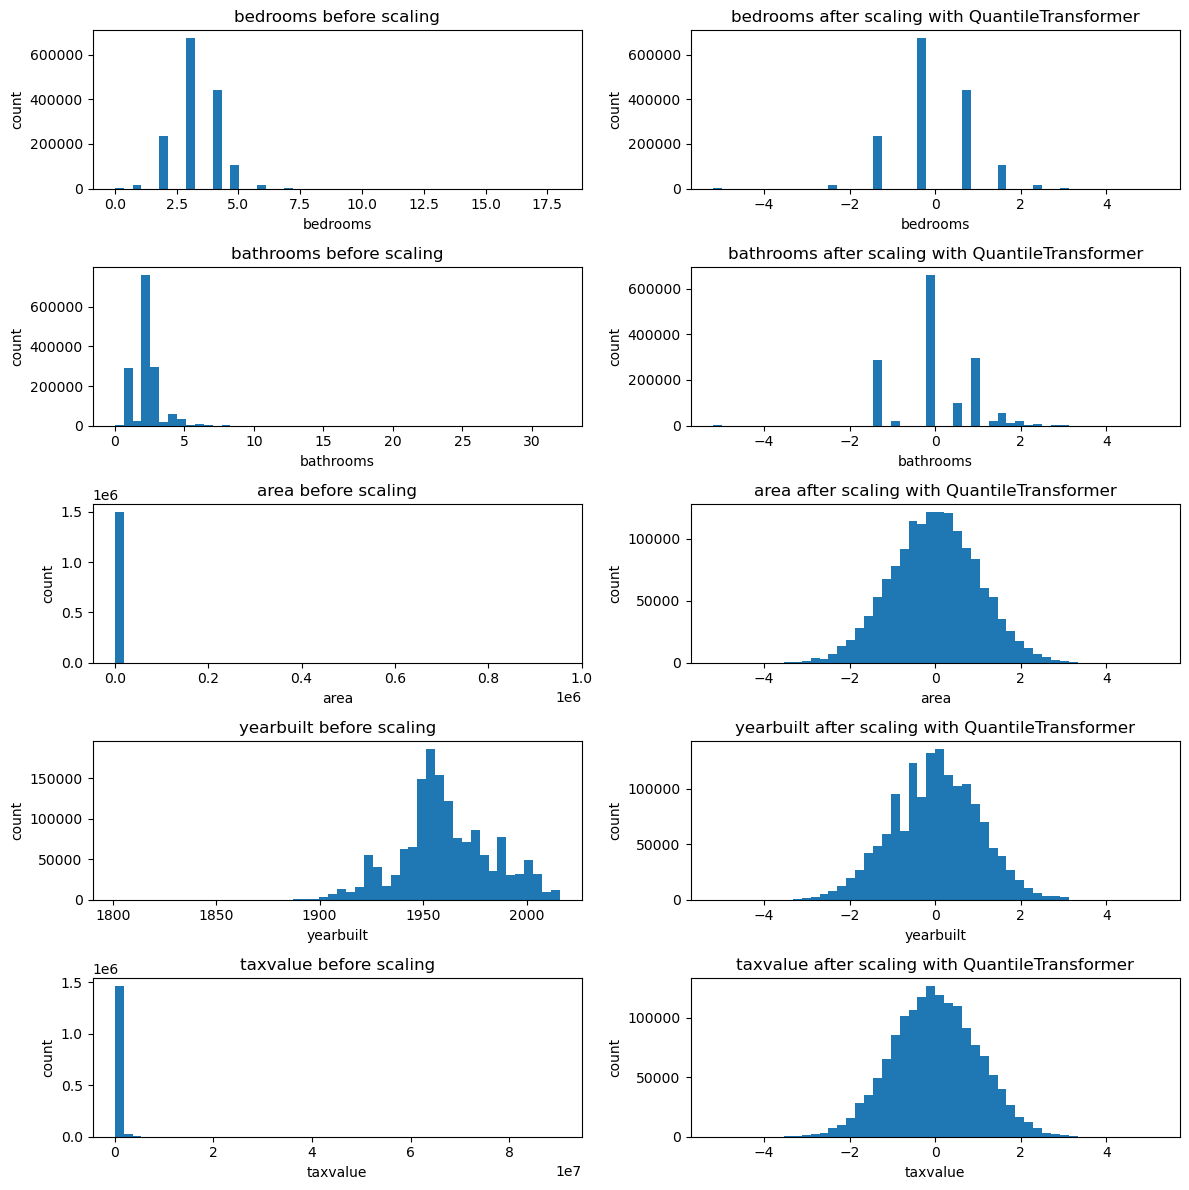

In [46]:
# call function using QuantileTransformer

visualize_scaler(scaler=QuantileTransformer(output_distribution='normal'), df=train, columns_to_scale=to_scale, bins=50) 


Noticed that with 'normal', the transformed data will be closer to a normal distribution. The histogram of the transformed data may resemble a bell curve centered around zero.

# 4 Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?


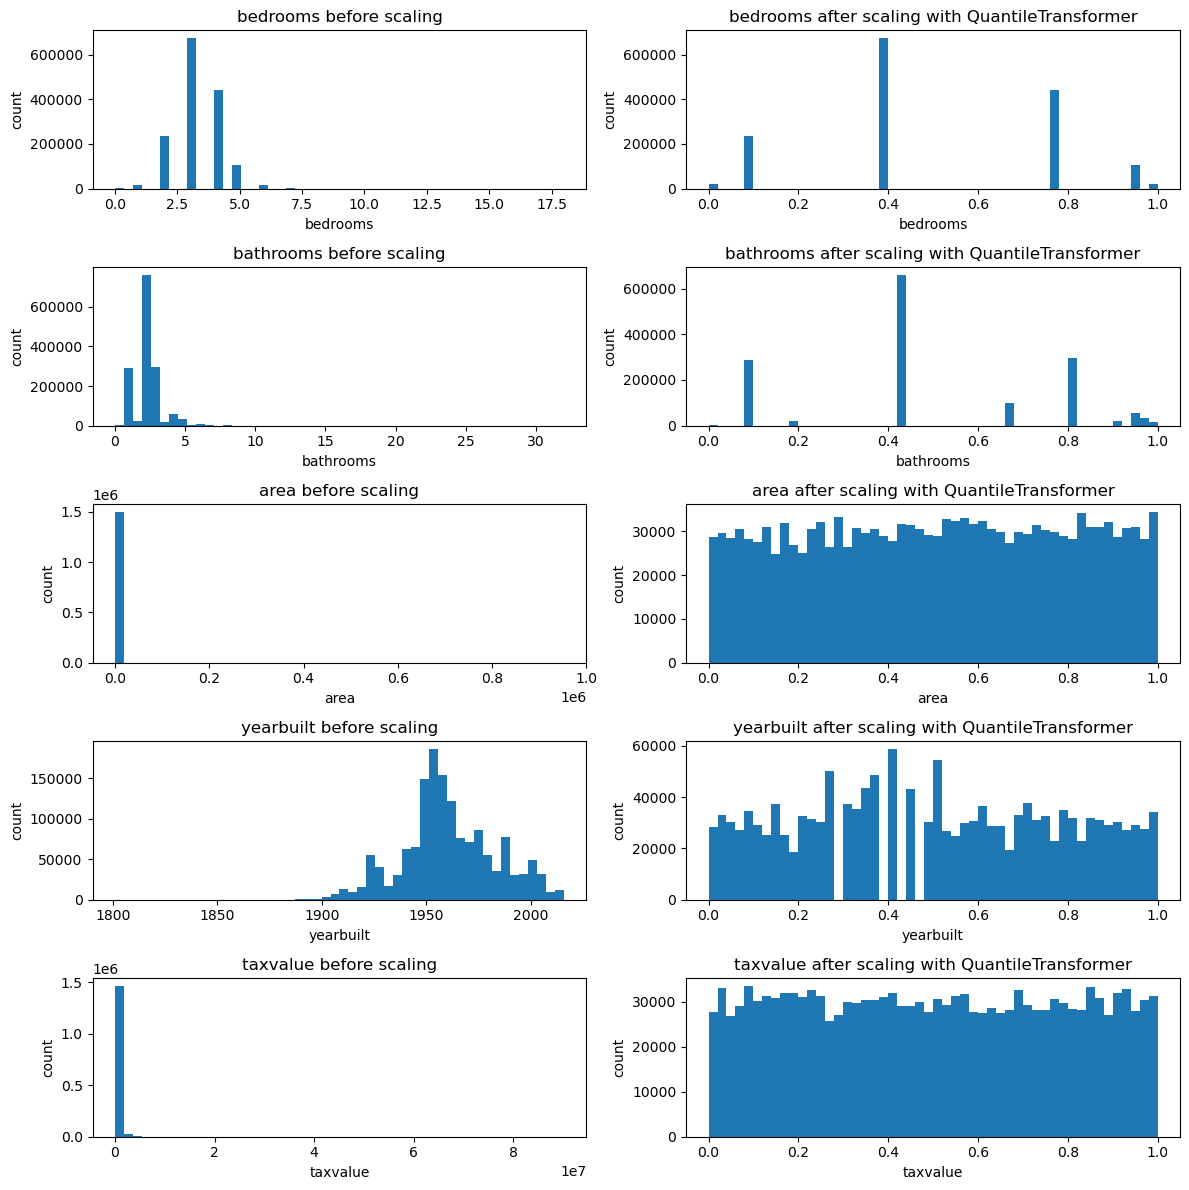

In [47]:
# call function using quantile transformer

visualize_scaler(scaler=QuantileTransformer(), df=train, columns_to_scale=to_scale, bins=50)


Note:-
When we omit output_distribution='normal' then by default it becomes output_distribution='uniform'(default)
 - the QuantileTransformer transforms your data into a uniform distribution, meaning that each quantile (percentile) of the original data will be uniformly spaced. This option often stretches or compresses the data to fit within a uniform range, but it may not necessarily follow a perfect normal (Gaussian) distribution.
The transformation is monotonically increasing, preserving the order of the data.

Noticed that With 'uniform', you may see that the transformed data is stretched or compressed to occupy a uniform range of values. The distribution may not resemble a normal distribution, especially if your original data had skewness or other non-uniform characteristics.

# 5 Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

In [48]:
train.sample(3)

,bedrooms,bathrooms,area,taxvalue,yearbuilt,taxamount,county
2075493,4,2.5,2306,690598,1977,7827.30,Orange
43498,3,2.0,1790,307672,1999,3605.32,Ventura
727161,3,3.0,1841,443729,1942,5353.45,LA


In [49]:
to_scale

['bedrooms', 'bathrooms', 'area', 'yearbuilt', 'taxvalue']

Function to preprocess your data by scaling it while ensuring that the scaling parameters are learned from the training data and applied consistently to all splits (training, validation, and test).

In [98]:
def scale_data(train, 
               validate, 
               test, 
               to_scale = ['bedrooms','bathrooms','area','yearbuilt','taxvalue'],
               return_scaler=False):
    '''
    Scales the 3 data splits. 
    Takes in train, validate, and test data splits and returns their scaled counterparts.
    If return_scalar is True, the scaler object will be returned as well
    '''
    # make copies of our original data so we dont gronk up anything
    train_scaled = train.copy()
    validate_scaled = validate.copy()
    test_scaled = test.copy()
    #     make the thing
    scaler = MinMaxScaler()
    #     fit the thing
    scaler.fit(train[to_scale])
    # applying the scaler:
    train_scaled[to_scale] = pd.DataFrame(scaler.transform(train[to_scale]),
                                                  columns=train[to_scale].columns.values).set_index([train.index.values])
                                                  
    validate_scaled[to_scale] = pd.DataFrame(scaler.transform(validate[to_scale]),
                                                  columns=validate[to_scale].columns.values).set_index([validate.index.values])
    
    test_scaled[to_scale] = pd.DataFrame(scaler.transform(test[to_scale]),
                                                 columns=test[to_scale].columns.values).set_index([test.index.values])
    
    if return_scaler:
        return scaler, train_scaled, validate_scaled, test_scaled
    else:
        return train_scaled, validate_scaled, test_scaled


In [99]:
scaler, train_scaled, validate_scaled, test_scaled = scale_data(train, validate, test, return_scaler=True)


In [107]:
scaler

MinMaxScaler()

In [ ]:
In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.


In [103]:
train_scaled

,bedrooms,bathrooms,area,taxvalue,yearbuilt,taxamount,county
1007466,0.166667,0.06250,0.001523,0.002672,0.832558,2974.81,LA
615622,0.166667,0.06250,0.001324,0.002612,0.706977,3029.22,LA
662507,0.166667,0.03125,0.001518,0.004824,0.679070,5226.67,LA
840040,0.166667,0.06250,0.001472,0.002980,0.762791,2849.62,Ventura
243798,0.166667,0.06250,0.001527,0.004047,0.744186,4582.48,LA
...,...,...,...,...,...,...,...
2015072,0.166667,0.06250,0.001344,0.003294,0.869767,4425.57,LA
1579246,0.222222,0.06250,0.001710,0.001995,0.688372,2447.30,LA
736495,0.166667,0.09375,0.001591,0.008158,0.683721,8485.13,LA
110997,0.111111,0.03125,0.001458,0.008744,0.562791,9558.78,LA


In [104]:
validate_scaled

,bedrooms,bathrooms,area,taxvalue,yearbuilt,taxamount,county
688607,0.166667,0.078125,0.001498,0.002408,0.860465,2957.58,Orange
459113,0.111111,0.031250,0.000911,0.001518,0.558140,1800.50,LA
68307,0.055556,0.031250,0.000730,0.005145,0.572093,5632.59,LA
107238,0.166667,0.093750,0.002358,0.005134,0.939535,6203.46,LA
338606,0.166667,0.062500,0.001625,0.003759,0.679070,5931.53,LA
...,...,...,...,...,...,...,...
2064715,0.222222,0.062500,0.001555,0.003108,0.781395,3683.10,Orange
1388716,0.388889,0.093750,0.003378,0.004235,0.944186,6033.98,LA
708211,0.166667,0.093750,0.001346,0.003979,0.720930,4425.00,Orange
123590,0.166667,0.062500,0.001056,0.002709,0.706977,3155.82,LA


In [105]:
test_scaled 

,bedrooms,bathrooms,area,taxvalue,yearbuilt,taxamount,county
612130,0.222222,0.109375,0.003078,0.009456,0.809302,9085.54,Orange
1549498,0.222222,0.093750,0.002226,0.003265,0.883721,2890.14,Orange
1665091,0.166667,0.093750,0.001599,0.004592,0.851163,6159.79,LA
1823967,0.222222,0.062500,0.001864,0.005404,0.655814,5825.60,LA
964615,0.277778,0.093750,0.003113,0.016716,0.818605,16869.33,LA
...,...,...,...,...,...,...,...
1394694,0.111111,0.031250,0.000811,0.004468,0.641860,4899.46,LA
993515,0.166667,0.062500,0.001925,0.003905,0.693023,4329.48,LA
818246,0.222222,0.062500,0.002082,0.002827,0.716279,3273.89,LA
489927,0.222222,0.062500,0.001820,0.001588,0.813953,1840.80,LA
